In [269]:
un_data <- read.csv("https://tinyurl.com/UNpckpdata")

In [270]:
dim(un_data)

[1] 147631      9

In [271]:
new_un_data <- na.omit(un_data)

In [272]:
dim(new_un_data)

[1] 147626      9

In [273]:
head(new_un_data)

,Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,31/07/2020
2,427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,31/07/2020
3,427905,ARG,32,Argentina,UNFICYP,Troops,15,219,31/07/2020
4,427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,31/07/2020
5,427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,31/07/2020
6,427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,31/07/2020


In [274]:
# Created a function that returns data's column classes

col_classes <- function(df) {t(as.data.frame(lapply(df, function(x) paste(class(x), collapse = ','))))}
                                                    
col_classes(new_un_data)                           

Contribution_ID,integer
ISOCode3,character
M49_Code,integer
Contributing_Country,character
Mission_Acronym,character
Personnel_Type,character
Female_Personnel,integer
Male_Personnel,integer
Last_Reporting_Date,character


In [275]:
new_un_data$Last_Reporting_Date = as.Date(new_un_data$Last_Reporting_Date,"%d/%m/%Y")

In [276]:
col_classes(new_un_data)

Contribution_ID,integer
ISOCode3,character
M49_Code,integer
Contributing_Country,character
Mission_Acronym,character
Personnel_Type,character
Female_Personnel,integer
Male_Personnel,integer
Last_Reporting_Date,Date


In [277]:
# Selected the rows that represent 'Formed Police' and filtered the dates for each year
 
police_units_2017 = new_un_data[new_un_data$Personnel_Type == 'Formed Police Units' & new_un_data$Last_Reporting_Date> "2017-01-01" & new_un_data$Last_Reporting_Date < "2017-12-31",]
police_units_2018 = new_un_data[new_un_data$Personnel_Type == 'Formed Police Units' & new_un_data$Last_Reporting_Date> "2018-01-01" & new_un_data$Last_Reporting_Date < "2018-12-31",]
police_units_2019 = new_un_data[new_un_data$Personnel_Type == 'Formed Police Units' & new_un_data$Last_Reporting_Date> "2019-01-01" & new_un_data$Last_Reporting_Date < "2019-12-31",]
police_units_2020 = new_un_data[new_un_data$Personnel_Type == 'Formed Police Units' & new_un_data$Last_Reporting_Date> "2020-01-01" & new_un_data$Last_Reporting_Date < "2020-03-31",]

# Calculating male and female numbers

male_number = sum(police_units$Male_Personnel)
female_number = sum(police_units$Female_Personnel)
male_number_2017 = sum(police_units_2017$Male_Personnel)
female_number_2017 = sum(police_units_2017$Female_Personnel)
male_number_2018 = sum(police_units_2018$Male_Personnel)
female_number_2018 = sum(police_units_2018$Female_Personnel)
male_number_2019 = sum(police_units_2019$Male_Personnel)
female_number_2019 = sum(police_units_2019$Female_Personnel)
male_number_2020 = sum(police_units_2020$Male_Personnel)
female_number_2020 = sum(police_units_2020$Female_Personnel)

In [278]:
# Calculating the percentage of female personnel

female_number_2017 / (male_number_2017 + female_number_2017)
female_number_2018 / (male_number_2018 + female_number_2018)
female_number_2019 / (male_number_2019 + female_number_2019)
female_number_2020 / (male_number_2020 + female_number_2020)



[1] 0.06421473

[1] 0.07529265

[1] 0.1034757

[1] 0.1082642

**I summed up the number of female personnel and divided by the number of total personnel working in the police units. It seems like only 10.83% of the people serving in formed police units were women in 2020 (as of March 2020). To meet the goal of 20% of women by 2028, the UN should aim to increase the percentage by roughly 1% each year.**

In [279]:
library(ggplot2)

In [280]:
# Created a new data frame that incorporates the statistics from 2017 to March 2020 and the goal state of 2028

df <- data.frame(year=c("2017", "2018", "2019", "2020", "2028"), percentage=c(6.4, 7.5, 10.3, 10.8, 20))
head(df)

,year,percentage
,<chr>,<dbl>
1,2017,6.4
2,2018,7.5
3,2019,10.3
4,2020,10.8
5,2028,20.0


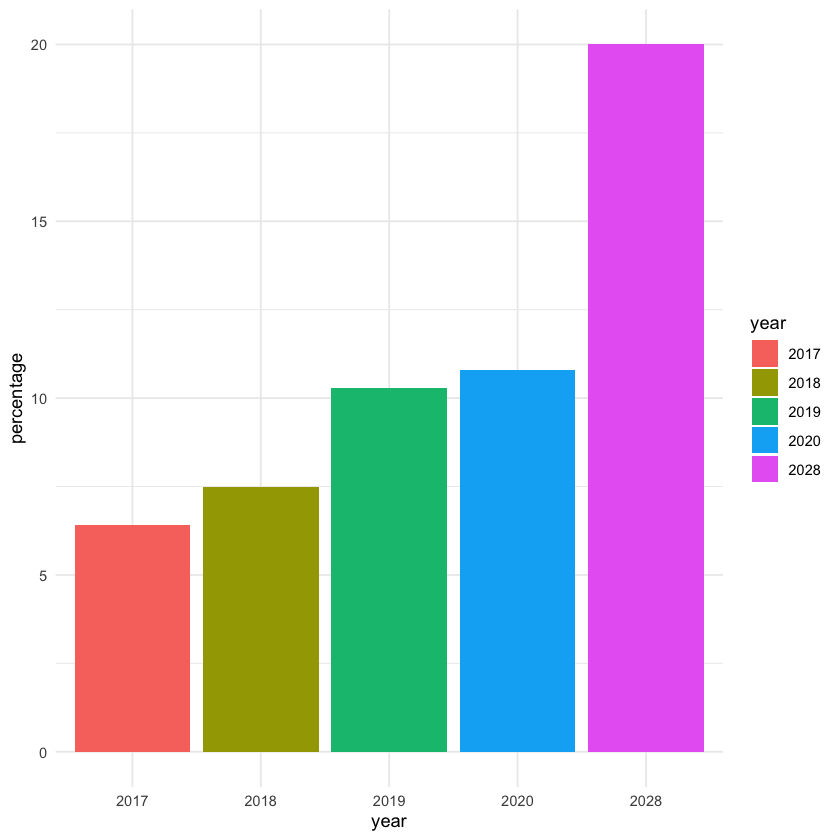

In [281]:
plot <- ggplot(data=df, aes(x=year, y=percentage, fill=year)) + geom_bar(stat="identity")+theme_minimal()
plot

In [282]:
# Remove leading and trailing whitespace from 'Mission Acronym' column

new_un_data$Mission_Acronym = trimws(new_un_data$Mission_Acronym, "both")

In [283]:
missions <- function(ISO) {
    
    country_data = unique(subset(new_un_data,ISOCode3==ISO,select=c(Mission_Acronym)))
    mission_name = list(country_data$Mission_Acronym)
    number = nrow(country_data)
    print(paste("The list of all the unique missions of", ISO, "is:", mission_name))
    print(paste("The number of unique missions of", ISO, "is:", number))
}

In [284]:
# I tried list(), toString(), View() and a couple of different methods but couldn't find any effective way to make this result prettier.

missions('USA')

[1] "The list of all the unique missions of USA is: c(\"BINUH\", \"MINUSCA\", \"MINUSMA\", \"MONUSCO\", \"UNMISS\", \"UNSMIL\", \"UNTSO\", \"MINUJUSTH\", \"UNMIL\", \"MINUSTAH\", \"UNAMA\", \"MINURCAT\", \"UNMIS\", \"UNMIK\", \"UNIOSIL\", \"UNAMID\", \"UNMIT\", \"UNOTIL\", \"UNAMSIL\", \"UNMISET\", \"UNIKOM\", \"UNMEE\", \"UNMIBH\")"
[1] "The number of unique missions of USA is: 23"


In [285]:
missions('KOR')

[1] "The list of all the unique missions of KOR is: c(\"MINURSO\", \"UNAMID\", \"UNIFIL\", \"UNMISS\", \"UNMOGIP\", \"UNMHA\", \"MINUJUSTH\", \"UNMIL\", \"UNOCI\", \"MINUSTAH\", \"UNMIT\", \"UNISFA\", \"UNMIS\", \"UNMIN\", \"UNAMA\", \"UNMISET\", \"UNFICYP\")"
[1] "The number of unique missions of KOR is: 17"


In [286]:
missions('IND')

[1] "The list of all the unique missions of IND is: c(\"MINURSO\", \"MONUSCO\", \"UNDOF\", \"UNFICYP\", \"UNIFIL\", \"UNISFA\", \"UNMISS\", \"UNTSO\", \"UNSOM\", \"MINUJUSTH\", \"MINUSTAH\", \"UNMIL\", \"UNAMA\", \"UNOCI\", \"UNAMI\", \"UNMIT\", \"UNMIS\", \"MONUC\", \"UNMIK\", \"UNIOSIL\", \"UNMEE\", \"ONUB\", \"UNOMIG\", \"UNAMSIL\", \"UNIKOM\", \"UNMIBH\")"
[1] "The number of unique missions of IND is: 26"


In [287]:
countries <- c('USA', 'KOR', 'IND', 'DEU', 'ARG', 'GBR', 'TWN')

for (val in countries) {
    missions(val)
}


[1] "The list of all the unique missions of USA is: c(\"BINUH\", \"MINUSCA\", \"MINUSMA\", \"MONUSCO\", \"UNMISS\", \"UNSMIL\", \"UNTSO\", \"MINUJUSTH\", \"UNMIL\", \"MINUSTAH\", \"UNAMA\", \"MINURCAT\", \"UNMIS\", \"UNMIK\", \"UNIOSIL\", \"UNAMID\", \"UNMIT\", \"UNOTIL\", \"UNAMSIL\", \"UNMISET\", \"UNIKOM\", \"UNMEE\", \"UNMIBH\")"
[1] "The number of unique missions of USA is: 23"
[1] "The list of all the unique missions of KOR is: c(\"MINURSO\", \"UNAMID\", \"UNIFIL\", \"UNMISS\", \"UNMOGIP\", \"UNMHA\", \"MINUJUSTH\", \"UNMIL\", \"UNOCI\", \"MINUSTAH\", \"UNMIT\", \"UNISFA\", \"UNMIS\", \"UNMIN\", \"UNAMA\", \"UNMISET\", \"UNFICYP\")"
[1] "The number of unique missions of KOR is: 17"
[1] "The list of all the unique missions of IND is: c(\"MINURSO\", \"MONUSCO\", \"UNDOF\", \"UNFICYP\", \"UNIFIL\", \"UNISFA\", \"UNMISS\", \"UNTSO\", \"UNSOM\", \"MINUJUSTH\", \"MINUSTAH\", \"UNMIL\", \"UNAMA\", \"UNOCI\", \"UNAMI\", \"UNMIT\", \"UNMIS\", \"MONUC\", \"UNMIK\", \"UNIOSIL\", \"UNMEE\", 

**It seems like Korea has been only part of 17 missions even though it has 10th biggest economy in the world in terms of nominal GDP. Germany has 4th biggest economy in the world but participated in onlt 18 missions. The UN should encourage those two countries to contribute more to global society by participating into peacekeeping activities.**